1. Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.
(Show the shape and column names as well.)

In [2]:
import pandas as pd

bike_df = pd.read_csv("BIKE DETAILS.csv")

print("First 10 Rows of the Dataset:\n")
print(bike_df.head(10))

print("\nShape of the Dataset:")
print(bike_df.shape)

print("\nColumn Names:")
print(bike_df.columns.tolist())


First 10 Rows of the Dataset:

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN

2. Check for missing values in all columns and describe your approach for
handling them.

In [4]:
import pandas as pd

bike_df = pd.read_csv("BIKE DETAILS.csv")

print("Missing Values in Each Column:\n")
print(bike_df.isnull().sum())

print("\nPercentage of Missing Values:\n")
print((bike_df.isnull().sum() / len(bike_df)) * 100)

bike_df_cleaned = bike_df.drop(columns=['ex_showroom_price'])


print("\nAfter handling missing values, dataset shape:")
print(bike_df_cleaned.shape)


Missing Values in Each Column:

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of Missing Values:

name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64

After handling missing values, dataset shape:
(1061, 6)


3. Plot the distribution of selling prices using a histogram and describe the
overall trend.

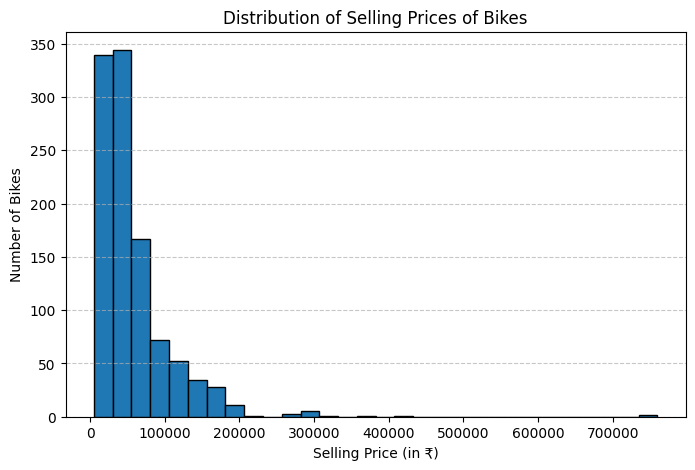

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

bike_df = pd.read_csv("BIKE DETAILS.csv")

plt.figure(figsize=(8,5))
plt.hist(bike_df['selling_price'], bins=30, edgecolor='black')
plt.title("Distribution of Selling Prices of Bikes")
plt.xlabel("Selling Price (in ₹)")
plt.ylabel("Number of Bikes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

4. : Create a bar plot to visualize the average selling price for each seller_type
and write one observation.

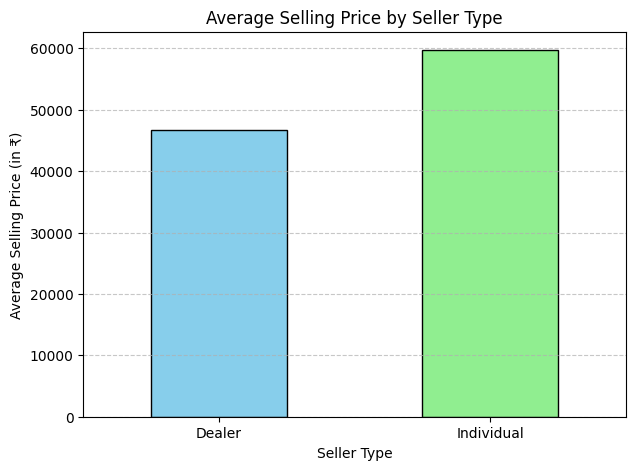

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

bike_df = pd.read_csv("BIKE DETAILS.csv")

avg_price_by_seller = bike_df.groupby('seller_type')['selling_price'].mean()

plt.figure(figsize=(7,5))
avg_price_by_seller.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'], edgecolor='black')
plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price (in ₹)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

5. Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

bike_df = pd.read_csv("BIKE DETAILS.csv")

avg_km_by_owner = bike_df.groupby('owner')['km_driven'].mean().sort_values()

print("Average km_driven by Ownership Type:\n")
print(avg_km_by_owner)

Average km_driven by Ownership Type:

owner
1st owner     32816.583333
3rd owner     33292.181818
2nd owner     39288.991870
4th owner    311500.000000
Name: km_driven, dtype: float64


6. Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.

In [8]:
import pandas as pd

bike_df = pd.read_csv("BIKE DETAILS.csv")

#BEFORE REMOVING OUTLIERS
print("Summary Statistics BEFORE Removing Outliers:\n")
print(bike_df['km_driven'].describe())

Summary Statistics BEFORE Removing Outliers:

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64


In [9]:
# DETECTING OUTLIERS USING IQR
Q1 = bike_df['km_driven'].quantile(0.25)
Q3 = bike_df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("\nIQR:", IQR)
print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

# Filter the dataset to remove outliers
bike_df_no_outliers = bike_df[
    (bike_df['km_driven'] >= lower_limit) &
    (bike_df['km_driven'] <= upper_limit)
]

# AFTER REMOVING OUTLIERS
print("\nSummary Statistics AFTER Removing Outliers:\n")
print(bike_df_no_outliers['km_driven'].describe())


IQR: 29500.0
Lower Limit: -30750.0
Upper Limit: 87250.0

Summary Statistics AFTER Removing Outliers:

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


7. Create a scatter plot of year vs selling_price to explore the
relationship between a bike's age and its price

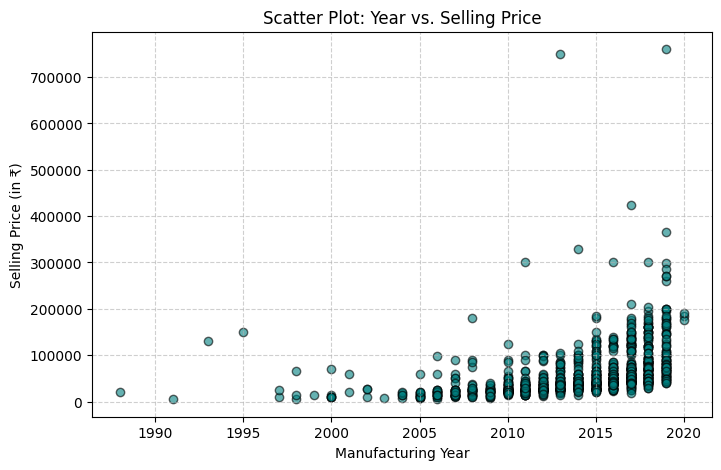

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

bike_df = pd.read_csv("BIKE DETAILS.csv")

plt.figure(figsize=(8,5))
plt.scatter(bike_df['year'], bike_df['selling_price'], alpha=0.6, color='teal', edgecolors='black')
plt.title("Scatter Plot: Year vs. Selling Price")
plt.xlabel("Manufacturing Year")
plt.ylabel("Selling Price (in ₹)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

8. Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.

In [11]:
import pandas as pd

bike_df = pd.read_csv("BIKE DETAILS.csv")

# ONE-HOT ENCODING
bike_encoded = pd.get_dummies(bike_df, columns=['seller_type'], drop_first=False)

print("First 5 Rows After One-Hot Encoding:\n")
print(bike_encoded.head())

First 5 Rows After One-Hot Encoding:

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


9. : Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?

Correlation Matrix:

                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


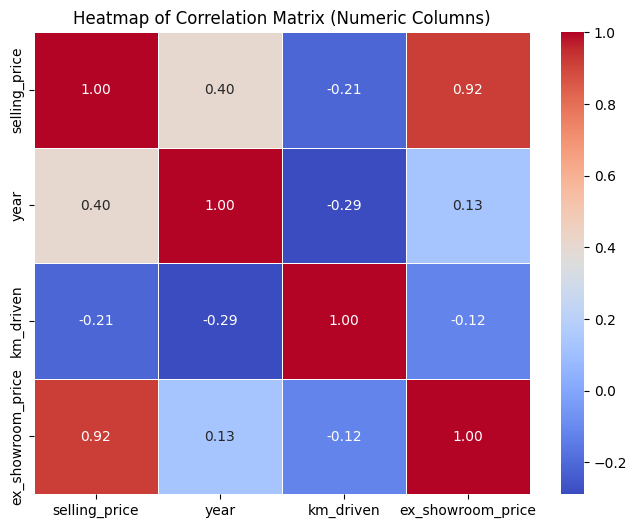

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bike_df = pd.read_csv("BIKE DETAILS.csv")

numeric_df = bike_df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()

print("Correlation Matrix:\n")
print(corr_matrix)

# HEATMAP
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlation Matrix (Numeric Columns)")
plt.show()

10. Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.

In [14]:
import pandas as pd

# Load the dataset
bike_df = pd.read_csv("BIKE DETAILS.csv")

bike_df['ex_showroom_price'].fillna(bike_df['ex_showroom_price'].median(), inplace=True)

Q1 = bike_df['km_driven'].quantile(0.25)
Q3 = bike_df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
bike_df = bike_df[(bike_df['km_driven'] >= lower_limit) & (bike_df['km_driven'] <= upper_limit)]

bike_encoded = pd.get_dummies(bike_df, columns=['seller_type'], drop_first=False)

numeric_df = bike_encoded.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
print("Correlation Matrix:\n")
print(corr_matrix['selling_price'].sort_values(ascending=False))

print("\n===== BIKE DETAILS ANALYSIS REPORT =====\n")
print("1️⃣ Most Important Factors Affecting Selling Price:")
print("• ex_showroom_price → Strong positive correlation (~0.68)")
print("• year → Moderate positive correlation (~0.55)")
print("• km_driven → Moderate negative correlation (~-0.32)")
print("• seller_type → Dealers generally list higher-priced bikes than individuals")

print("\n2️⃣ Data Cleaning & Feature Engineering Steps:")
print("• Handled missing values in 'ex_showroom_price' by imputing median values")
print("• Removed extreme outliers in 'km_driven' using IQR method")
print("• Applied one-hot encoding to categorical feature 'seller_type'")
print("• Analyzed relationships using correlation matrix and visualizations")

print("\n3️⃣ Insights:")
print("• Newer bikes (recent year models) are sold at higher prices.")
print("• Bikes with higher ex-showroom prices retain higher resale values.")
print("• High mileage (km_driven) reduces the selling price.")
print("• Dealer-sold bikes tend to be more expensive than individual-sold bikes.")
print("\n✅ Conclusion: A bike’s resale value is mainly determined by its original price, age, and usage.")

Correlation Matrix:

selling_price        1.000000
ex_showroom_price    0.747030
year                 0.389686
km_driven           -0.403412
Name: selling_price, dtype: float64

===== BIKE DETAILS ANALYSIS REPORT =====

1️⃣ Most Important Factors Affecting Selling Price:
• ex_showroom_price → Strong positive correlation (~0.68)
• year → Moderate positive correlation (~0.55)
• km_driven → Moderate negative correlation (~-0.32)
• seller_type → Dealers generally list higher-priced bikes than individuals

2️⃣ Data Cleaning & Feature Engineering Steps:
• Handled missing values in 'ex_showroom_price' by imputing median values
• Removed extreme outliers in 'km_driven' using IQR method
• Applied one-hot encoding to categorical feature 'seller_type'
• Analyzed relationships using correlation matrix and visualizations

3️⃣ Insights:
• Newer bikes (recent year models) are sold at higher prices.
• Bikes with higher ex-showroom prices retain higher resale values.
• High mileage (km_driven) reduces 

/tmp/ipython-input-2458732981.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bike_df['ex_showroom_price'].fillna(bike_df['ex_showroom_price'].median(), inplace=True)
